## TRABAJO PRACTICO Nº4

### Integrantes
* Ferreyra Fernando (77108)
* Molins Rodrigo (75569)

## Propuesta
Estudiar el comportamiento de lazo cerrado de un sistema multirrotor de un grado de libertad tipo
balancín utilizando simulación. Se propone crear un modelo en tiempo discreto basado en ecuaciones en
diferencias cuya evolución temporal se realizará utilizando funciones de bucle en Python.


####1.Hacer las condiciones iniciales y las acciones de control igual a cero y verificar la estabilidad del punto de equilibrio q = [0, 0]. **¿Existen otros puntos de equilibrio?**.####



Si consideramos que el punto equilbrio sea que el VANT de ala rotante se encuentra en vuelo estacionario, el mismo seria aquella cuya fuerza de empuje contrarreste la fuerza ejercida por la aceleracion de la gravedad.


####2. Analizar la respuesta del sistema frente a:####
* a) Diferentes condiciones iniciales
* b) Acción de control de tipo escalón unitario

a) Sin importar la condicion inicial si no hay accion de control $ω$ permanece constante en cualquier escenario.

b) $ω$ aumenta linealmente por lo que $θ$ se comporta como una cuadratica.



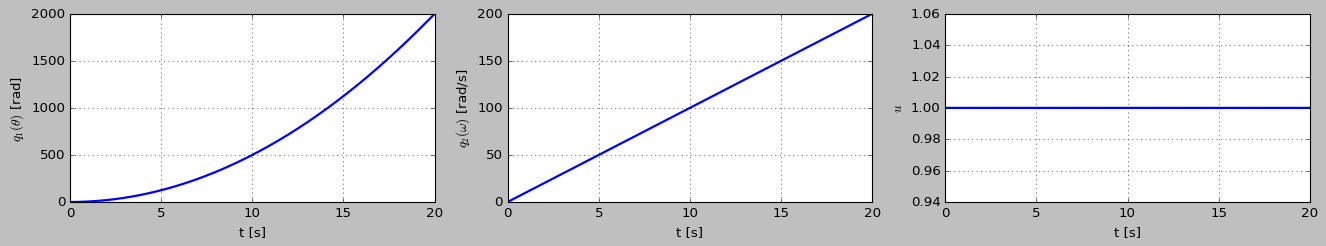

In [ ]:
from numpy.core.fromnumeric import size
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('classic')
#from plot_q_u import plot_q_u

# Parámetros de simulación.
J = 100e-3      # Momento de inercia
T = 20          # Tiempo de simulación
dt = 0.001        # Intervalo de muestreo
N = int(T/dt)   # Índice máximo de estados discreto
ref=1
Kp=1

# Vector de tiempos discretos
ts = np.linspace(0, T-dt, N)

# Vector de estado inicial.
# q1 = theta; q2 = theta_punto
q0 = np.array( (0, 0) )

# Vector de estado e inicialización.
q = np.zeros( (2, N) )
q[:, 0] = q0

# Vector de acciones de control.
#u = np.zeros( (1, N) )
u = np.ones( (1, N) )


# Matrices del sistema de estado discretizado.
A = np.array([ [1, dt], [0, 1] ])
B = np.array([ [0], [dt/J] ])

# Bucle para el cálculo de los estados.
for i in range(1, N):
    q[:, i] = A.dot( q[:, i-1] ) + B.dot( u[:, i-1] )

fig = plt.figure(figsize=(20, 10), frameon=True)
#plot_q_u(q, u, ts)
plt.subplot(3, 3, 4), plt.plot(ts, q[0, :], color="blue", linewidth=2, linestyle="-", ), plt.grid(True)
plt.ylabel(r'$q_1 (\theta)$ [rad] '), plt.xlabel('t [s]')
plt.subplot(3, 3, 5), plt.plot(ts, q[1, :], color="blue", linewidth=2, linestyle="-", ), plt.grid(True)
plt.ylabel(r'$q_2 (\omega)$ [rad/s]'), plt.xlabel('t [s]')
plt.subplot(3, 3, 6), plt.plot(ts, u[0, :],color="blue", linewidth=2, linestyle="-", ), plt.grid(True)
plt.ylabel('$u$'),  plt.xlabel('t [s]')
plt.show()

###Realizar las modificaciones necesarias en el script para obtener un modelo de lazo cerrado que tome una muestra de la posición angular de salida y la compare con la señaal de referencia para generar un error que se usará como acción de control multiplicada por un factor constante $K_{P}$.###

####3. Simular para KP = 0, 1; KP = 1 y KP = 10. Contrastar el resultado con los valores obtenidos con el paquete de control en el trabajo anterior.####



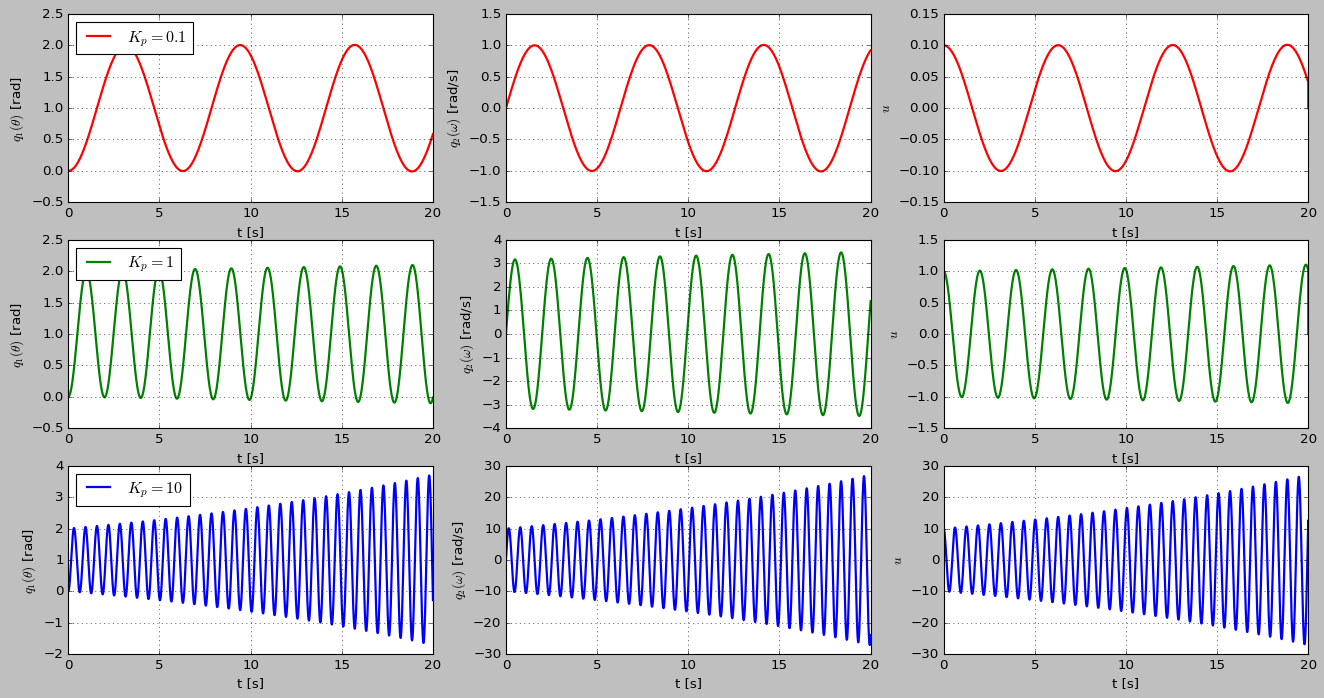

In [ ]:
from numpy.core.fromnumeric import size
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('classic')
#from plot_q_u import plot_q_u

# Parámetros de simulación.
J = 100e-3      # Momento de inercia
T = 20          # Tiempo de simulación
dt = 0.001        # Intervalo de muestreo
N = int(T/dt)   # Índice máximo de estados discretos
ref=1
Kp=1

# Vector de tiempos discretos
ts = np.linspace(0, T-dt, N)

# Vector de estado inicial.
# q1 = theta; q2 = theta_punto
q0 = np.array( (0, 0) )

# Vector de estado e inicialización.
q = np.zeros( (2, N) )
q[:, 0] = q0

# Vector de acciones de control.
u = np.zeros( (1, N) )
#u = np.ones( (1, N) )


# Matrices del sistema de estado discretizado.
A = np.array([ [1, dt], [0, 1] ])
B = np.array([ [0], [dt/J] ])

# Bucle para el cálculo de los estados.
for i in range(1, N):
    u[0, i-1]= Kp*(ref-q[0,i-1])
    q[:, i] = A.dot( q[:, i-1] ) + B.dot( u[:, i-1] )

fig = plt.figure(figsize=(20, 10), frameon=True)
#plot_q_u(q, u, ts)
plt.subplot(3, 3, 4), plt.plot(ts, q[0, :], color="green", linewidth=2, linestyle="-", label="$K_{p}=1$"), plt.grid(True)
plt.ylabel(r'$q_1 (\theta)$ [rad] '), plt.legend(loc='upper left'), plt.xlabel('t [s]')
plt.subplot(3, 3, 5), plt.plot(ts, q[1, :], color="green", linewidth=2, linestyle="-", ), plt.grid(True)
plt.ylabel(r'$q_2 (\omega)$ [rad/s]'), plt.xlabel('t [s]')
plt.subplot(3, 3, 6), plt.plot(ts, u[0, :],color="green", linewidth=2, linestyle="-", ), plt.grid(True)
plt.ylabel('$u$'),  plt.xlabel('t [s]')

for i in range(1, N):
    u[0, i-1]= 10*(ref-q[0,i-1])
    q[:, i] = A.dot( q[:, i-1] ) + B.dot( u[:, i-1] )

#plot_q_u(q, u, ts)
plt.subplot(3, 3, 7), plt.plot(ts, q[0, :], color="blue", linewidth=2, linestyle="-", label="$K_{p}=10$"), plt.grid(True)
plt.ylabel(r'$q_1 (\theta)$ [rad] '), plt.legend(loc='upper left'), plt.xlabel('t [s]')
plt.subplot(3, 3, 8), plt.plot(ts, q[1, :],color="blue", linewidth=2, linestyle="-"), plt.grid(True)
plt.ylabel(r'$q_2 (\omega)$ [rad/s]'), plt.xlabel('t [s]')
plt.subplot(3, 3, 9), plt.plot(ts, u[0, :],color="blue", linewidth=2, linestyle="-"), plt.grid(True)
plt.ylabel('$u$'), plt.xlabel('t [s]')

for i in range(1, N):
    u[0, i-1]= 0.1*(ref-q[0,i-1])
    q[:, i] = A.dot( q[:, i-1] ) + B.dot( u[:, i-1] )

#plot_q_u(q, u, ts)
plt.subplot(3, 3, 1), plt.plot(ts, q[0, :], color="red", linewidth=2, linestyle="-", label="$K_{p}=0.1$"), plt.grid(True)
plt.ylabel(r'$q_1 (\theta)$ [rad] '),plt.legend(loc='upper left'),  plt.xlabel('t [s]')
plt.subplot(3, 3, 2), plt.plot(ts, q[1, :],color="red", linewidth=2, linestyle="-"), plt.grid(True)
plt.ylabel(r'$q_2 (\omega)$ [rad/s]'), plt.xlabel('t [s]')
plt.subplot(3, 3, 3), plt.plot(ts, u[0, :],color="red", linewidth=2, linestyle="-"), plt.grid(True)
plt.ylabel('$u$'), plt.xlabel('t [s]')

plt.show()

###Introducir la modificaciones necesarias en el script para que utilizando cociente de diferencias se obtenga la derivada de la señal de posición angular $θ_{o(t)}$.  Utilizar esta señal para implementar un compensador derivativo.###
####4. Obtener las gráficas para valores de K = 0, 1; K = 1; K = 10 usando para cada caso los valores de $T_{d} = 0$ , 1; $T_{d} = T_{d,crit}$ y $Td = 2$.####




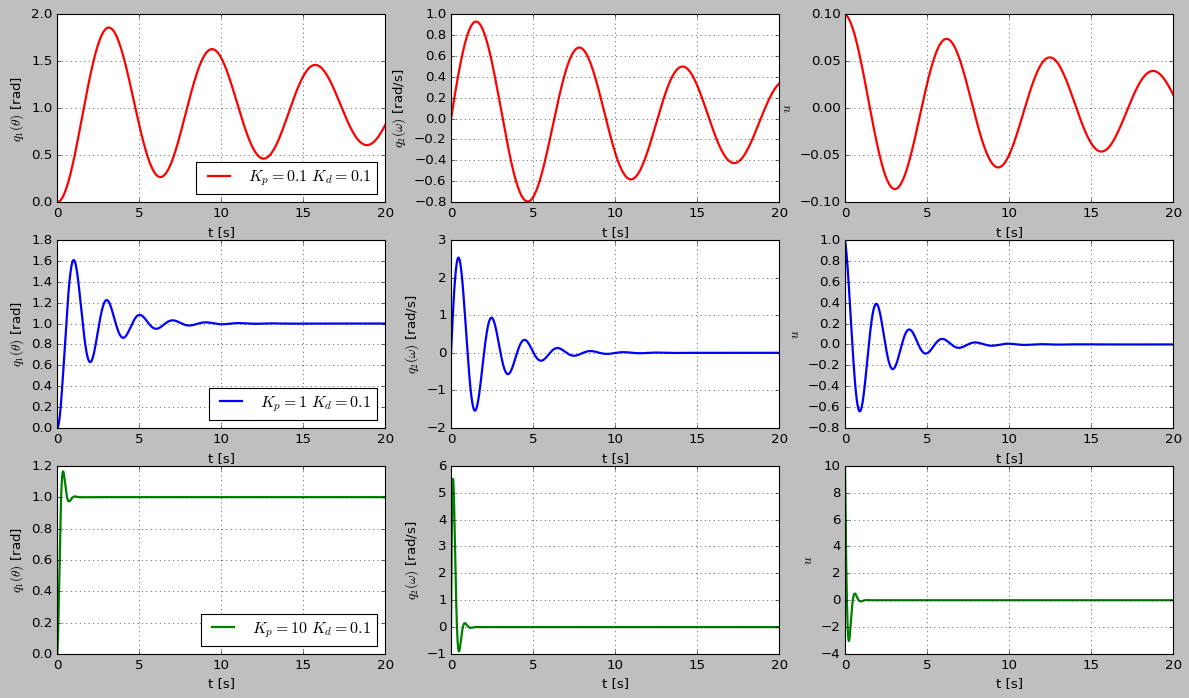

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('classic')
import math
#from plot_q_u import plot_q_u

# Parámetros de simulación.
J = 100e-3      # Momento de inercia
T = 20          # Tiempo de simulación
dt = 0.001        # Intervalo de muestreo
N = int(T/dt)   # Índice máximo de estados discretos
ref=1
Kp=1
Kd=0.1

# Vector de tiempos discretos
ts = np.linspace(0, T-dt, N)

# Vector de estado inicial.
# q1 = theta; q2 = theta_punto
q0 = np.array( (0, 0) )

# Vector de estado e inicialización.
q = np.zeros( (2, N) )
q[:, 0] = q0

# Vector de acciones de control.
u = np.zeros( (1, N) )
#u = np.ones( (1, N) )
e = np.zeros( (1, 2) )

# Matrices del sistema de estado discretizado.
A = np.array([ [1, dt], [0, 1] ])
B = np.array([ [0], [dt/J] ])

# Bucle para el cálculo de los estados.
# Kp=1
for i in range(1, N):
    q[:, i] = A.dot( q[:, i-1] ) + B.dot( u[:, i-1] )
    e[0,0]=(ref-q[0, i])
    e[0,1]=(e[0,0]-(ref-q[0,i-1]))/dt
    u[:, i]= Kp*(e[0,0]+Kd*e[0,1])

fig = plt.figure(figsize=(18, 10))
#plot_q_u(q, u, ts)
plt.subplot(3, 3, 4), plt.plot(ts, q[0, :],color="blue", linewidth=2, linestyle="-", label="$K_{p}=1$ $K_{d}=0.1$"), plt.grid(True)
plt.ylabel(r'$q_1 (\theta)$ [rad]'), plt.legend(loc='lower right'), plt.xlabel('t [s]')
plt.subplot(3, 3, 5), plt.plot(ts, q[1, :],color="blue", linewidth=2, linestyle="-"), plt.grid(True)
plt.ylabel(r'$q_2 (\omega)$ [rad/s]'), plt.xlabel('t [s]')
plt.subplot(3, 3, 6), plt.plot(ts, u[0, :],color="blue", linewidth=2, linestyle="-"), plt.grid(True)
plt.ylabel('$u$'), plt.xlabel('t [s]')

# Kp=10
e = np.zeros( (1, 2) )
for i in range(1, N):
    q[:, i] = A.dot( q[:, i-1] ) + B.dot( u[:, i-1] )
    e[0,0]=(ref-q[0, i])
    e[0,1]=(e[0,0]-(ref-q[0,i-1]))/dt
    u[:, i]= 10*(e[0,0]+Kd*e[0,1])


#plot_q_u(q, u, ts)
plt.subplot(3, 3, 7), plt.plot(ts, q[0, :],color="green", linewidth=2, linestyle="-", label="$K_{p}=10$ $K_{d}=0.1$"), plt.grid(True)
plt.ylabel(r'$q_1 (\theta)$ [rad]'), plt.legend(loc='lower right'), plt.xlabel('t [s]')
plt.subplot(3, 3, 8), plt.plot(ts, q[1, :],color="green", linewidth=2, linestyle="-"), plt.grid(True)
plt.ylabel(r'$q_2 (\omega)$ [rad/s]'), plt.xlabel('t [s]')
plt.subplot(3, 3, 9), plt.plot(ts, u[0, :],color="green", linewidth=2, linestyle="-"), plt.grid(True)
plt.ylabel('$u$'), plt.xlabel('t [s]')

# Kp=0.1
e = np.zeros( (1, 2) )
for i in range(1, N):
    q[:, i] = A.dot( q[:, i-1] ) + B.dot( u[:, i-1] )
    e[0,0]=(ref-q[0, i])
    e[0,1]=(e[0,0]-(ref-q[0,i-1]))/dt
    u[:, i]= 0.1*(e[0,0]+Kd*e[0,1])


#plot_q_u(q, u, ts)
plt.subplot(3, 3, 1), plt.plot(ts, q[0, :],color="red", linewidth=2, linestyle="-", label="$K_{p}=0.1$ $K_{d}=0.1$"), plt.grid(True)
plt.ylabel(r'$q_1 (\theta)$ [rad]'), plt.legend(loc='lower right'), plt.xlabel('t [s]')
plt.subplot(3, 3, 2), plt.plot(ts, q[1, :],color="red", linewidth=2, linestyle="-"), plt.grid(True)
plt.ylabel(r'$q_2 (\omega)$ [rad/s]'), plt.xlabel('t [s]')
plt.subplot(3, 3, 3), plt.plot(ts, u[0, :],color="red", linewidth=2, linestyle="-"), plt.grid(True)
plt.ylabel('$u$'), plt.xlabel('t [s]')
plt.show()



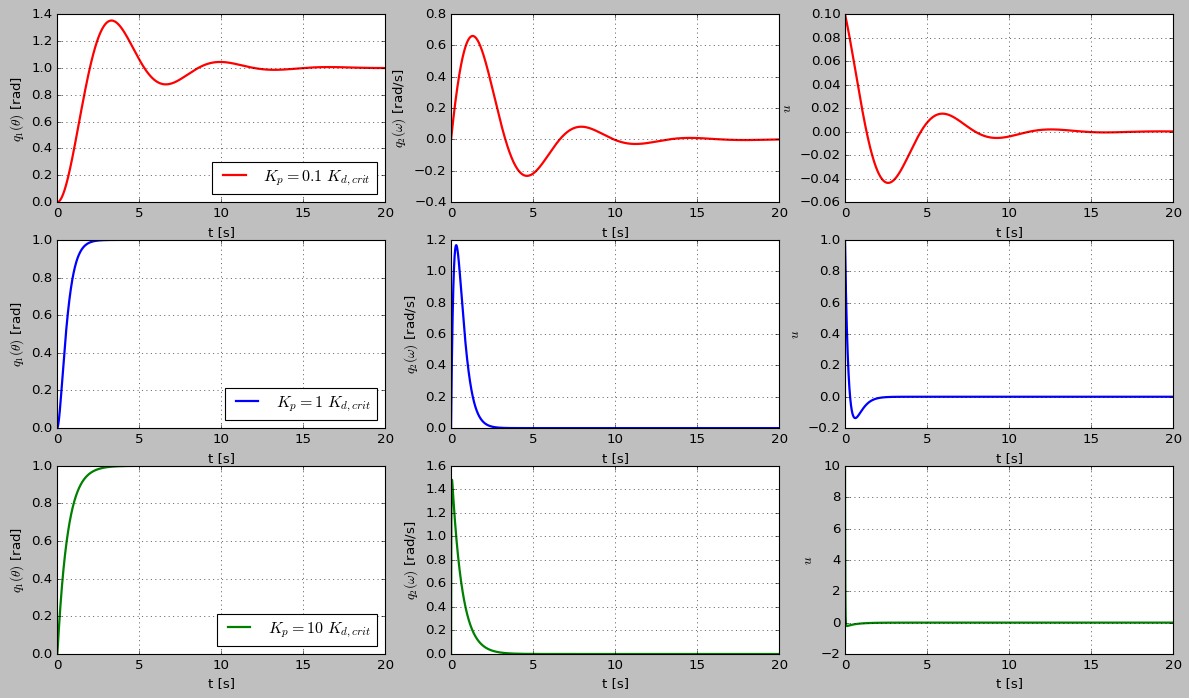

In [ ]:

Kp=1 #Kd(critico)
Kd=np.sqrt(2/5)


for i in range(1, N):
    q[:, i] = A.dot( q[:, i-1] ) + B.dot( u[:, i-1] )
    e[0,0]=(ref-q[0, i])
    e[0,1]=(e[0,0]-(ref-q[0,i-1]))/dt
    u[:, i]= Kp*(e[0,0]+Kd*e[0,1])

fig = plt.figure(figsize=(18, 10))
#plot_q_u(q, u, ts)
plt.subplot(3, 3, 4), plt.plot(ts, q[0, :],color="blue", linewidth=2, linestyle="-", label="$K_{p}=1$ $K_{d,crit}$"), plt.grid(True)
plt.ylabel(r'$q_1 (\theta)$ [rad]'), plt.legend(loc='lower right'), plt.xlabel('t [s]')
plt.subplot(3, 3, 5), plt.plot(ts, q[1, :],color="blue", linewidth=2, linestyle="-"), plt.grid(True)
plt.ylabel(r'$q_2 (\omega)$ [rad/s]'), plt.xlabel('t [s]')
plt.subplot(3, 3, 6), plt.plot(ts, u[0, :],color="blue", linewidth=2, linestyle="-"), plt.grid(True)
plt.ylabel('$u$'), plt.xlabel('t [s]')

Kp=10
for i in range(1, N):
    q[:, i] = A.dot( q[:, i-1] ) + B.dot( u[:, i-1] )
    e[0,0]=(ref-q[0, i])
    e[0,1]=(e[0,0]-(ref-q[0,i-1]))/dt
    u[:, i]= Kp*(e[0,0]+Kd*e[0,1])


#plot_q_u(q, u, ts)
plt.subplot(3, 3, 7), plt.plot(ts, q[0, :],color="green", linewidth=2, linestyle="-", label="$K_{p}=10$ $K_{d,crit}$"), plt.grid(True)
plt.ylabel(r'$q_1 (\theta)$ [rad]'), plt.legend(loc='lower right'), plt.xlabel('t [s]')
plt.subplot(3, 3, 8), plt.plot(ts, q[1, :],color="green", linewidth=2, linestyle="-"), plt.grid(True)
plt.ylabel(r'$q_2 (\omega)$ [rad/s]'), plt.xlabel('t [s]')
plt.subplot(3, 3, 9), plt.plot(ts, u[0, :],color="green", linewidth=2, linestyle="-"), plt.grid(True)
plt.ylabel('$u$'), plt.xlabel('t [s]')

Kp=0.1
for i in range(1, N):
    q[:, i] = A.dot( q[:, i-1] ) + B.dot( u[:, i-1] )
    e[0,0]=(ref-q[0, i])
    e[0,1]=(e[0,0]-(ref-q[0,i-1]))/dt
    u[:, i]= Kp*(e[0,0]+Kd*e[0,1])


#plot_q_u(q, u, ts)
plt.subplot(3, 3, 1), plt.plot(ts, q[0, :],color="red", linewidth=2, linestyle="-", label="$K_{p}=0.1$ $K_{d,crit}$"), plt.grid(True)
plt.ylabel(r'$q_1 (\theta)$ [rad]'), plt.legend(loc='lower right'), plt.xlabel('t [s]')
plt.subplot(3, 3, 2), plt.plot(ts, q[1, :],color="red", linewidth=2, linestyle="-"), plt.grid(True)
plt.ylabel(r'$q_2 (\omega)$ [rad/s]'), plt.xlabel('t [s]')
plt.subplot(3, 3, 3), plt.plot(ts, u[0, :],color="red", linewidth=2, linestyle="-"), plt.grid(True)
plt.ylabel('$u$'), plt.xlabel('t [s]')
plt.show()


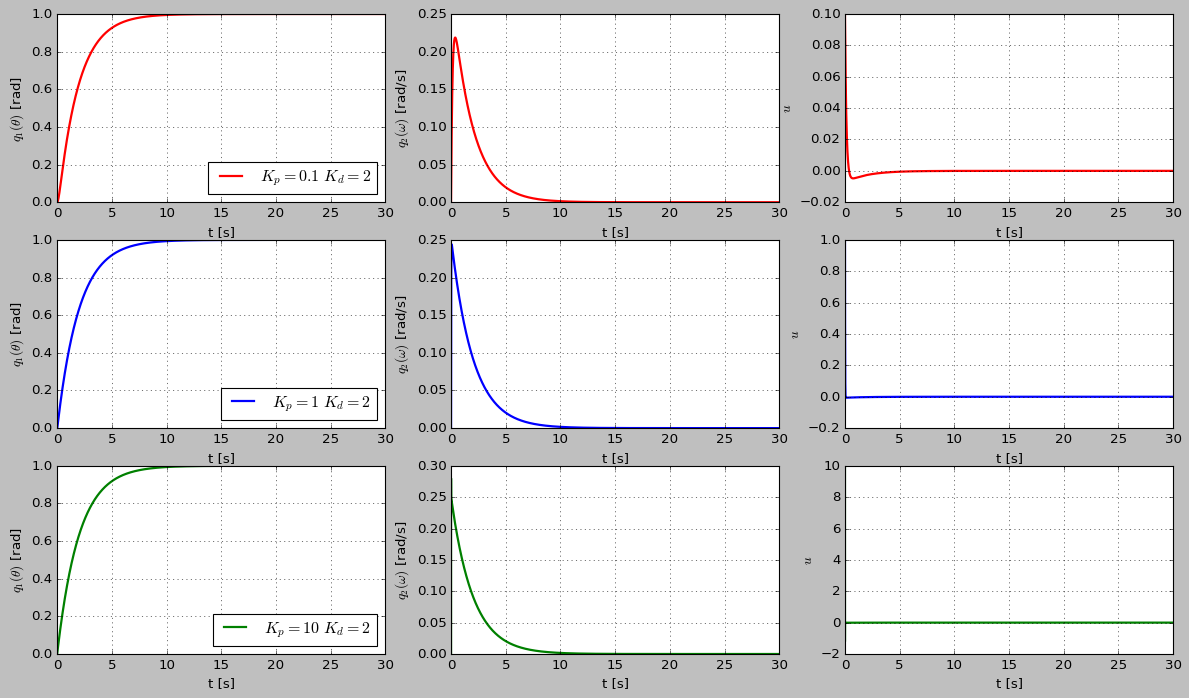

In [ ]:

Kp=1 #Kd(critico)
Kd=2


for i in range(1, N):
    q[:, i] = A.dot( q[:, i-1] ) + B.dot( u[:, i-1] )
    e[0,0]=(ref-q[0, i])
    e[0,1]=(e[0,0]-(ref-q[0,i-1]))/dt
    u[:, i]= Kp*(e[0,0]+Kd*e[0,1])

fig = plt.figure(figsize=(18, 10))
#plot_q_u(q, u, ts)
plt.subplot(3, 3, 4), plt.plot(ts, q[0, :],color="blue", linewidth=2, linestyle="-", label="$K_{p}=1$ $K_{d}=2$"), plt.grid(True)
plt.ylabel(r'$q_1 (\theta)$ [rad]'), plt.legend(loc='lower right'), plt.xlabel('t [s]')
plt.subplot(3, 3, 5), plt.plot(ts, q[1, :],color="blue", linewidth=2, linestyle="-"), plt.grid(True)
plt.ylabel(r'$q_2 (\omega)$ [rad/s]'), plt.xlabel('t [s]')
plt.subplot(3, 3, 6), plt.plot(ts, u[0, :],color="blue", linewidth=2, linestyle="-"), plt.grid(True)
plt.ylabel('$u$'), plt.xlabel('t [s]')

Kp=10
for i in range(1, N):
    q[:, i] = A.dot( q[:, i-1] ) + B.dot( u[:, i-1] )
    e[0,0]=(ref-q[0, i])
    e[0,1]=(e[0,0]-(ref-q[0,i-1]))/dt
    u[:, i]= Kp*(e[0,0]+Kd*e[0,1])


#plot_q_u(q, u, ts)
plt.subplot(3, 3, 7), plt.plot(ts, q[0, :],color="green", linewidth=2, linestyle="-", label="$K_{p}=10$ $K_{d}=2$"), plt.grid(True)
plt.ylabel(r'$q_1 (\theta)$ [rad]'), plt.legend(loc='lower right'), plt.xlabel('t [s]')
plt.subplot(3, 3, 8), plt.plot(ts, q[1, :],color="green", linewidth=2, linestyle="-"), plt.grid(True)
plt.ylabel(r'$q_2 (\omega)$ [rad/s]'), plt.xlabel('t [s]')
plt.subplot(3, 3, 9), plt.plot(ts, u[0, :],color="green", linewidth=2, linestyle="-"), plt.grid(True)
plt.ylabel('$u$'), plt.xlabel('t [s]')

Kp=0.1
for i in range(1, N):
    q[:, i] = A.dot( q[:, i-1] ) + B.dot( u[:, i-1] )
    e[0,0]=(ref-q[0, i])
    e[0,1]=(e[0,0]-(ref-q[0,i-1]))/dt
    u[:, i]= Kp*(e[0,0]+Kd*e[0,1])


#plot_q_u(q, u, ts)
plt.subplot(3, 3, 1), plt.plot(ts, q[0, :],color="red", linewidth=2, linestyle="-", label="$K_{p}=0.1$ $K_{d}=2$"), plt.grid(True)
plt.ylabel(r'$q_1 (\theta)$ [rad]'), plt.legend(loc='lower right'), plt.xlabel('t [s]')
plt.subplot(3, 3, 2), plt.plot(ts, q[1, :],color="red", linewidth=2, linestyle="-"), plt.grid(True)
plt.ylabel(r'$q_2 (\omega)$ [rad/s]'), plt.xlabel('t [s]')
plt.subplot(3, 3, 3), plt.plot(ts, u[0, :],color="red", linewidth=2, linestyle="-"), plt.grid(True)
plt.ylabel('$u$'), plt.xlabel('t [s]')
plt.show()


###Agregar ruido de medición en la posición angular introduciendo la siguiente línea al final del bucle de actualización de los estados.

**$q[0, i+1] = q[0, i+1] + fn*(np.random.rand() - 0.5) * q[0, i+1]$**

Ajustar el parámetro de amplitud del ruido fn a 0, 02 (2 %) y 0, 05 (5 %).###
####5. Correr la simulación y obtener las gráficas correspondientes cuando $K_{P} = 1$ y $Td = T_{d,crit}$.####

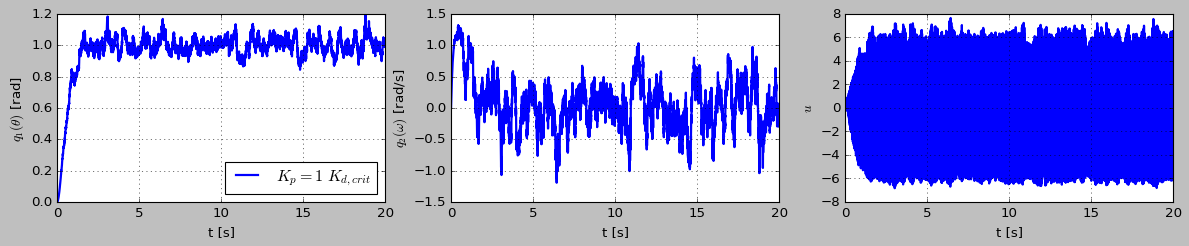

In [ ]:
T = 20          # Tiempo de simulación
dt = 0.001        # Intervalo de muestreo
N = int(T/dt)   # Índice máximo de estados discretos

# Vector de tiempos discretos
ts = np.linspace(0, T-dt, N)

# Vector de estado inicial.
# q1 = theta; q2 = theta_punto
q0 = np.array( (0, 0) )

# Vector de estado e inicialización.
q = np.zeros( (2, N) )
q[:, 0] = q0

# Vector de acciones de control.
u = np.zeros( (1, N) )
#u = np.ones( (1, N) )
e = np.zeros( (1, 2) )

Kp=1 #Kd(critico)
Kd=np.sqrt(2/5)
fn = 0.02


for i in range(1, N):
    q[:, i] = A.dot( q[:, i-1] ) + B.dot( u[:, i-1] )
    q[0, i] = q[0, i] + fn * (np.random.rand() - 0.5) * q[0, i]
    e[0,0]=(ref-q[0, i])
    e[0,1]=(e[0,0]-(ref-q[0,i-1]))/dt
    u[:, i]= Kp*(e[0,0]+Kd*e[0,1])

fig = plt.figure(figsize=(18, 10))
#plot_q_u(q, u, ts)
plt.subplot(3, 3, 4), plt.plot(ts, q[0, :],color="blue", linewidth=2, linestyle="-", label="$K_{p}=1$ $K_{d,crit}$"), plt.grid(True)
plt.ylabel(r'$q_1 (\theta)$ [rad]'), plt.legend(loc='lower right'), plt.xlabel('t [s]')
plt.subplot(3, 3, 5), plt.plot(ts, q[1, :],color="blue", linewidth=2, linestyle="-"), plt.grid(True)
plt.ylabel(r'$q_2 (\omega)$ [rad/s]'), plt.xlabel('t [s]')
plt.subplot(3, 3, 6), plt.plot(ts, u[0, :],color="blue", linewidth=2, linestyle="-"), plt.grid(True)
plt.ylabel('$u$'), plt.xlabel('t [s]')
plt.show()

###Conclusión###
En este trabajo se analizó el comportamiento de un sistema multirrotor de un grado de libertad tipo balancín empleando un integrador discreto para ver el resultado de la acción de control.

Partiendo del analisis en el que implementamos el lazo cerrado mediante la accion de control u, pudimos notar que variando las condiciones inicales del balancin no tendran efecto si la accion de control no esta actuando, manteniendo a $ω$ constante.

Debido al caracter del sistema, una variación de la accion de control se comporta como un valor derivado reflejado en $ω$, a su vez $teta$ un valor derivado de $ω$ por lo que se puede estimar de esta manera la posición angular.

Dependiendo de las constantes de proporcionalidad y derivativa, el sistema presenta diversas respuestas estables, en algunos casos subamortiguada, en otros amortiguada y tambien criticamente amortiguada.
